# REGRESSION

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [19]:
import pandas as pd
df = pd.read_csv('coal_dataset.csv')

In [3]:
df

,period,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content
0,2023,Pennsylvania (Bituminous),3943,FirstEnergy Fort Martin Power Station,BIT,Bituminous,8.66,12711,61.42,1939159,3.04
1,2023,Virginia,56808,Virginia City Hybrid Energy Center,BIT,Bituminous,32.35,8186,55.40,488938,0.81
2,2023,Wyoming,8066,Jim Bridger,TOT,All,10.61,9215,64.26,4698553,0.54
3,2023,Ohio,6071,Trimble County,TOT,All,8.49,10985,49.04,3330230,2.44
4,2023,Illinois,6071,Trimble County,BIT,Bituminous,9.24,11518,49.37,2669367,2.96
...,...,...,...,...,...,...,...,...,...,...,...
20416,2008,Virginia,3797,Chesterfield,TOT,All,9.59,12675,68.26,3055272,1.15
20417,2008,Kentucky (East),3935,John E Amos,BIT,Bituminous,12.01,12124,62.36,5948900,0.81
20418,2008,Kentucky (East),3936,Kanawha River,BIT,Bituminous,12.53,12191,65.87,948100,0.79
20419,2008,Texas,7030,Twin Oaks Power One,TOT,All,15.97,6785,NaN,1984261,1.07


In [4]:
# Replace NaN values with the column mean
df['price'] = df['price'].fillna(df['price'].mean())

# Binary target variable from 'coalRankDescription'
df['binary_coal_rank'] = df['coalRankDescription'].apply(lambda x: 1 if x == 'Bituminous' else 0)

df

,period,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,binary_coal_rank
0,2023,Pennsylvania (Bituminous),3943,FirstEnergy Fort Martin Power Station,BIT,Bituminous,8.66,12711,61.420000,1939159,3.04,1
1,2023,Virginia,56808,Virginia City Hybrid Energy Center,BIT,Bituminous,32.35,8186,55.400000,488938,0.81,1
2,2023,Wyoming,8066,Jim Bridger,TOT,All,10.61,9215,64.260000,4698553,0.54,0
3,2023,Ohio,6071,Trimble County,TOT,All,8.49,10985,49.040000,3330230,2.44,0
4,2023,Illinois,6071,Trimble County,BIT,Bituminous,9.24,11518,49.370000,2669367,2.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20416,2008,Virginia,3797,Chesterfield,TOT,All,9.59,12675,68.260000,3055272,1.15,0
20417,2008,Kentucky (East),3935,John E Amos,BIT,Bituminous,12.01,12124,62.360000,5948900,0.81,1
20418,2008,Kentucky (East),3936,Kanawha River,BIT,Bituminous,12.53,12191,65.870000,948100,0.79,1
20419,2008,Texas,7030,Twin Oaks Power One,TOT,All,15.97,6785,58.592239,1984261,1.07,0


In [11]:
# Select features and label
X = df[['ash-content', 'heat-content', 'price', 'quantity', 'sulfur-content']]
y = df['binary_coal_rank']



# Standardize features for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_log_reg * 100)
print("Confusion Matrix:\n", conf_matrix_log_reg)

# Multinomial Naive Bayes
mnb = MultinomialNB()
X_train_mnb = X_train.copy()
X_train_mnb[X_train_mnb < 0] = 0  # Replace negative values for MultinomialNB
X_test_mnb = X_test.copy()
X_test_mnb[X_test_mnb < 0] = 0
mnb.fit(X_train_mnb, y_train)
y_pred_mnb = mnb.predict(X_test_mnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)

print("\nMultinomial Naive Bayes Results:")
print("Accuracy:", accuracy_mnb * 100)
print("Confusion Matrix:\n", conf_matrix_mnb)


Logistic Regression Results:
Accuracy: 67.81459115390894
Confusion Matrix:
 [[2975 1070]
 [ 902 1180]]

Multinomial Naive Bayes Results:
Accuracy: 67.66770034274523
Confusion Matrix:
 [[3615  430]
 [1551  531]]


In [7]:
X_train

,ash-content,heat-content,price,quantity,sulfur-content
10175,8.13,12991,78.590000,246541,2.20
6670,7.27,12070,62.430000,1542284,2.85
7403,11.54,12332,79.720000,734666,1.90
17890,13.79,11829,58.592239,411810,2.49
8561,9.28,12552,93.830000,5313817,1.66
...,...,...,...,...,...
11284,5.79,8898,34.390000,4121272,0.38
11964,9.90,12580,58.592239,3172,1.59
5390,11.95,11478,44.960000,3311080,3.46
860,9.42,11325,65.140000,4448943,2.54


In [8]:
X_test

,ash-content,heat-content,price,quantity,sulfur-content
17243,10.56,10938,58.592239,2185314,2.87
12656,7.80,12100,63.720000,49201,2.78
12692,8.40,12922,58.592239,493320,3.29
5348,4.89,8630,58.592239,3003305,0.28
15099,22.59,8487,28.380000,7890507,0.79
...,...,...,...,...,...
5118,4.84,8940,42.680000,2048109,0.24
2231,8.48,11906,59.190000,90059,2.56
10899,5.97,9811,48.600000,1635950,0.41
14169,11.01,12381,59.550000,3452942,2.06


In [9]:
y_train

,binary_coal_rank
10175,0
6670,1
7403,1
17890,0
8561,0
...,...
11284,0
11964,0
5390,0
860,0


In [10]:
y_test

,binary_coal_rank
17243,0
12656,0
12692,0
5348,0
15099,0
...,...
5118,0
2231,1
10899,0
14169,1


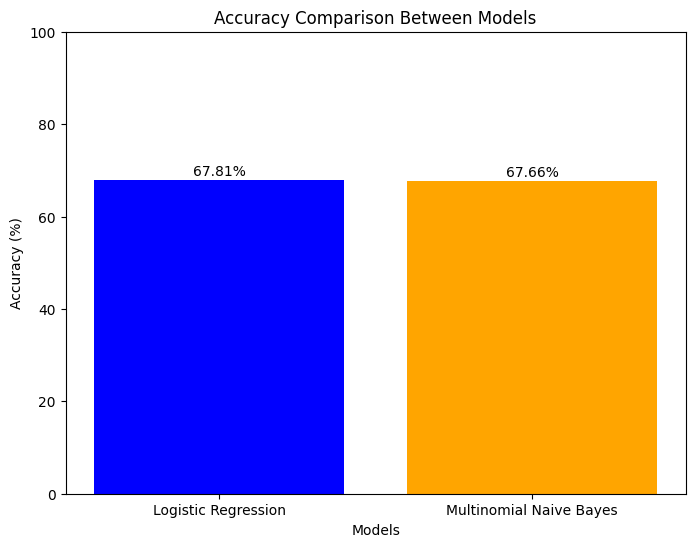

In [12]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['Logistic Regression', 'Multinomial Naive Bayes']
accuracies = [67.81, 67.66]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylim(0, 100)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison Between Models')
plt.text(0, accuracies[0] + 1, f"{accuracies[0]:.2f}%", ha='center', fontsize=10)
plt.text(1, accuracies[1] + 1, f"{accuracies[1]:.2f}%", ha='center', fontsize=10)
plt.show()


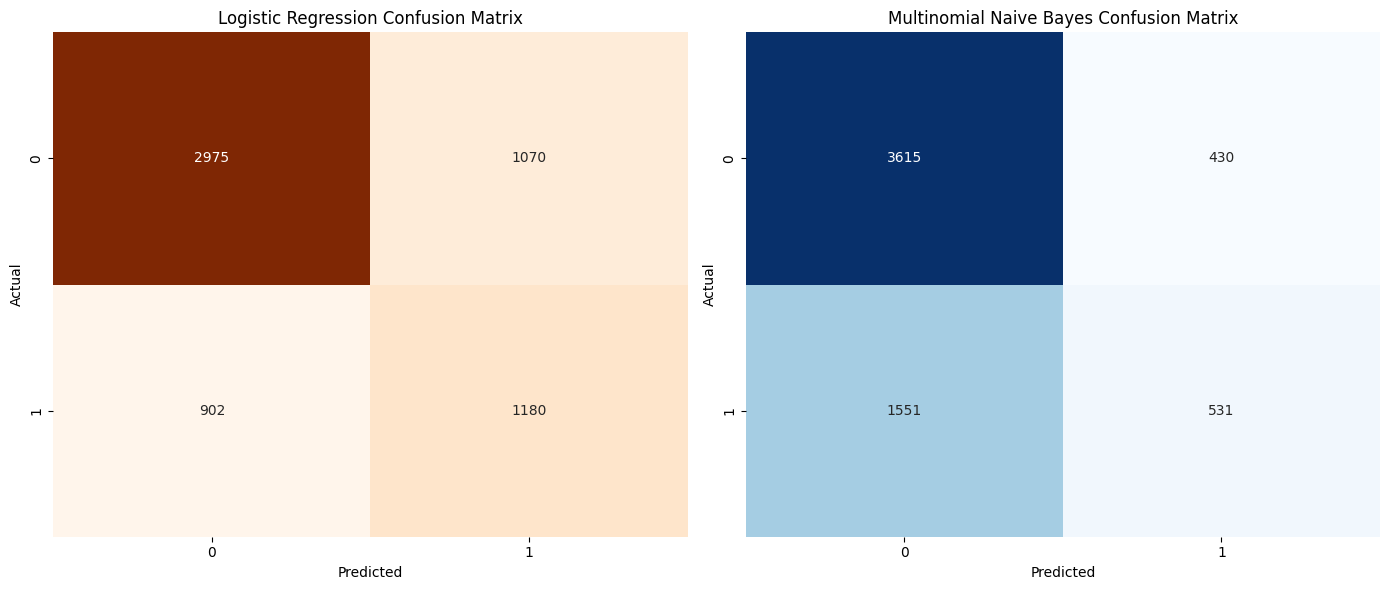

In [16]:
import seaborn as sns
import numpy as np

# Confusion matrices
conf_matrix_log_reg = np.array([[2975, 1070], [902, 1180]])
conf_matrix_mnb = np.array([[3615, 430], [1551, 531]])

# Heatmaps for Logistic Regression
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Heatmaps for Multinomial Naive Bayes
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_mnb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


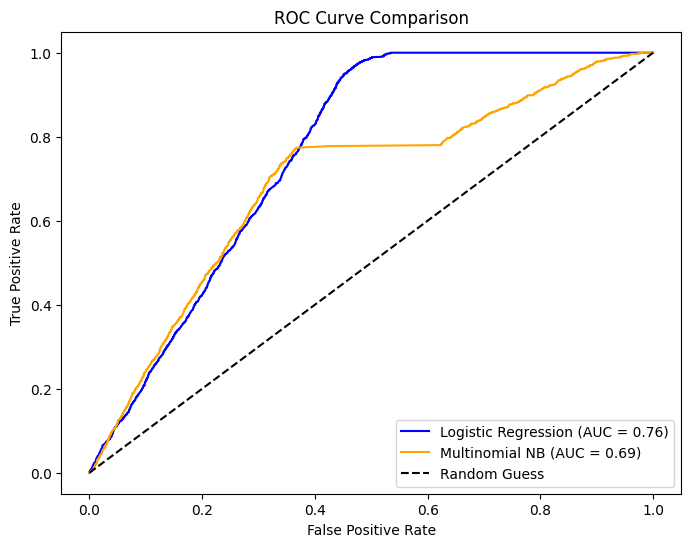

In [14]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression predictions
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log_reg)
roc_auc_log = auc(fpr_log, tpr_log)

# Multinomial Naive Bayes predictions
y_pred_prob_mnb = mnb.predict_proba(X_test_mnb)[:, 1]
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, y_pred_prob_mnb)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

# ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})', color='blue')
plt.plot(fpr_mnb, tpr_mnb, label=f'Multinomial NB (AUC = {roc_auc_mnb:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()
